<a href="https://colab.research.google.com/github/tanzilahmed0/CS-133/blob/main/Tanzil_Ahmed_CS133_ho7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url ='https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv'
alcohol_df = pd.read_csv(url)

alcohol_df.drop('total_litres_of_pure_alcohol', axis=1, inplace=True)

melted_alc = alcohol_df.melt(
    id_vars=['country'],
    var_name='drink',
    value_name='servings'
)

melted_alc


,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

Text(0.5, 1.05, 'Top 10 Countries that Drink the Most Spirits')

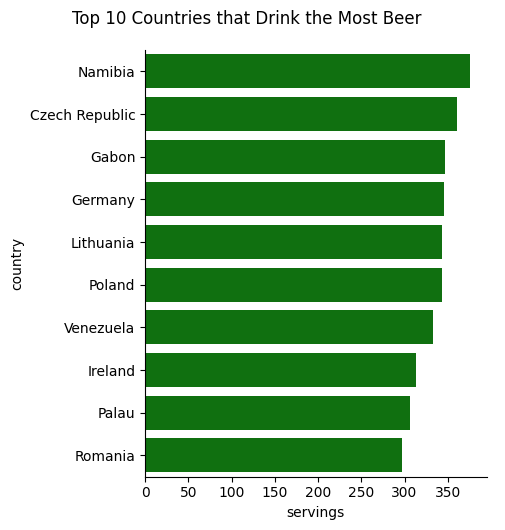

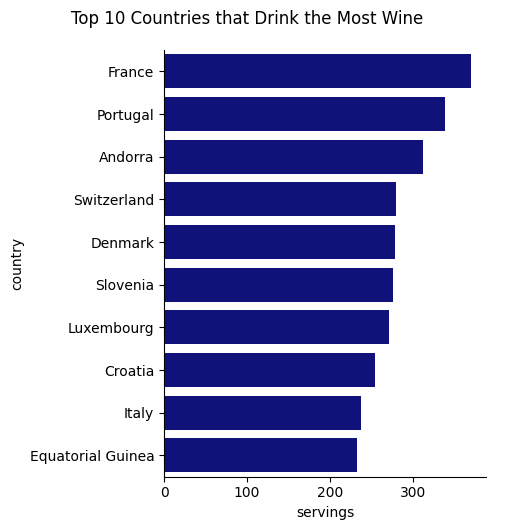

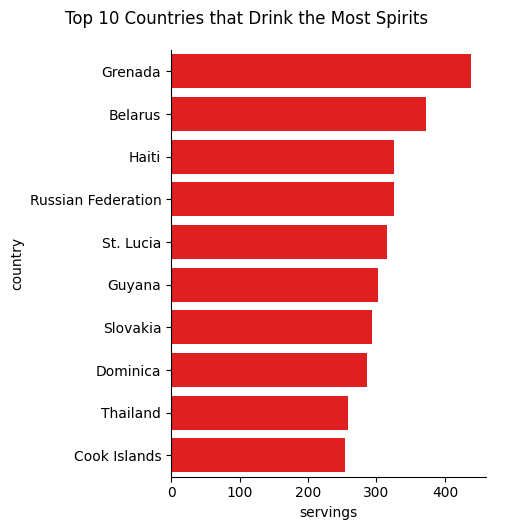

In [ ]:
# Removing "_servings" from the drink column
melted_alc['drink'] = melted_alc['drink'].str.replace("_servings", "")


# Sorting countries by top 10 countries
# Filter for beer servings and sort by servings
beer_sorted = melted_alc[melted_alc['drink'] == 'beer'].sort_values(by='servings', ascending=False).head(10)
wine_sorted = melted_alc[melted_alc['drink'] == 'wine'].sort_values(by='servings', ascending=False).head(10)
spirits_sorted = melted_alc[melted_alc['drink'] == 'spirit'].sort_values(by='servings', ascending=False).head(10)




# Creating three categorical plots
beer = sns.catplot(
    data=beer_sorted,
    x='servings',
    y='country',
    kind='bar',
    color='green',
)
beer.fig.suptitle("Top 10 Countries that Drink the Most Beer", y=1.05)

wine = sns.catplot(
    data=wine_sorted,
    x='servings',
    y='country',
    kind='bar',
    color='darkblue',
)
wine.fig.suptitle("Top 10 Countries that Drink the Most Wine", y=1.05)

spirits = sns.catplot(
    data=spirits_sorted,
    x='servings',
    y='country',
    kind='bar',
    color='red',
)
spirits.fig.suptitle("Top 10 Countries that Drink the Most Spirits", y=1.05)




## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [ ]:
pd.pivot_table(melted_alc, values='servings', columns = 'drink', index='country')

drink,beer,spirit,wine
country,,,
Afghanistan,0.0,0.0,0.0
Albania,89.0,132.0,54.0
Algeria,25.0,0.0,14.0
Andorra,245.0,138.0,312.0
Angola,217.0,57.0,45.0
...,...,...,...
Venezuela,333.0,100.0,3.0
Vietnam,111.0,2.0,1.0
Yemen,6.0,0.0,0.0
